# PyTorchを使った機械学習

Reference
- [[Youtube]【QC4U2】Quantum Computing for You, The Second Chance!【講義編第2回】](https://www.youtube.com/watch?v=SiqzBFw2o0g&list=TLGGwOWtoP9CNZMxNTA2MjAyNA)

参考notebookはコチラ  
https://colab.research.google.com/gist/mohzeki222/c9492f43ac9e0ad784d333e696e2b38f/qc4u2_day2_learning.ipynb#scrollTo=9IMueWwhnJ4a

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = -2.5 + 5.0*np.random.rand(100)

In [3]:
t = np.sin(x) + 0.01*np.random.randn(100)

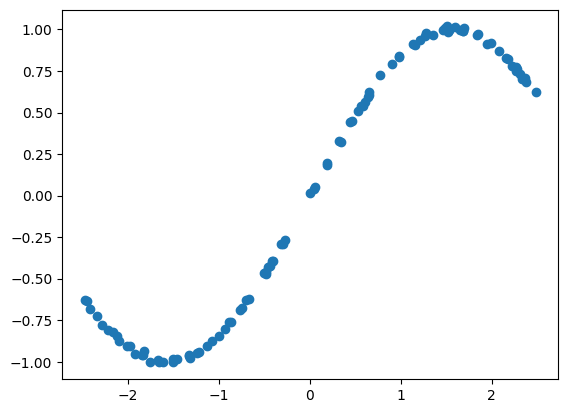

In [4]:
plt.scatter(x, t)
plt.show()

In [5]:
xdata = x.reshape(100, 1)
tdata = t.reshape(100, 1)

xdata = torch.tensor(xdata, dtype=torch.float32)
tdata = torch.tensor(tdata, dtype=torch.float32)

In [6]:
# 
dataset = torch.utils.data.TensorDataset(xdata, tdata)

In [7]:
n_train = int(len(dataset) * 0.8)
n_test = len(dataset) - n_train

In [8]:
train_set, test_set = torch.utils.data.random_split(dataset, [n_train, n_test])

In [9]:
# 小分けにするサイズ（学習データ80問を、10問ずつ学習する。）
batch_size = 10

In [10]:
# batch_size個ずつランダムに取り出す準備。
# (これからtrain_loaderやtest_loaderを呼び出すとbatch_size個ずつデータを取り出すことができる。)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [11]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(1, 1) # 入力数1, 出力数1の線形変換. y = ax+b
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        h = self.fc1(x)
        y = self.sig(h)
        return y

In [12]:
net = NN()

In [13]:
criterion = nn.MSELoss()

In [14]:
#optimizer = optim.SGD(net.parameters(), lr=0.1)
optimizer = optim.Adam(net.parameters(), lr=0.1)

In [15]:
# 学習
train_loss_value = []
test_loss_value = []

In [16]:
Tall = 500 # 学習させる回数

cnt = 0
for epoch in range(Tall):
    sum_loss = 0
    for batch in train_loader:
        #print('cnt =', cnt)
        cnt += 1
        optimizer.zero_grad() # 勾配の初期化
        xtrain, ttrain = batch
        #print(xtrain)
        ytrain = net(xtrain)
        #print(ytrain)
        loss = criterion(ytrain, ttrain)
        loss.backward()
        optimizer.step()
        sum_loss += loss.item()
    train_loss_value.append(sum_loss/len(train_loader))

    # testデータ
    sum_loss = 0
    for batch in test_loader:
        xtest, ttest = batch
        ytest = net(xtest)
        loss = criterion(ytest, ttest)
        sum_loss += loss.item()
    test_loss_value.append(sum_loss/len(test_loader))


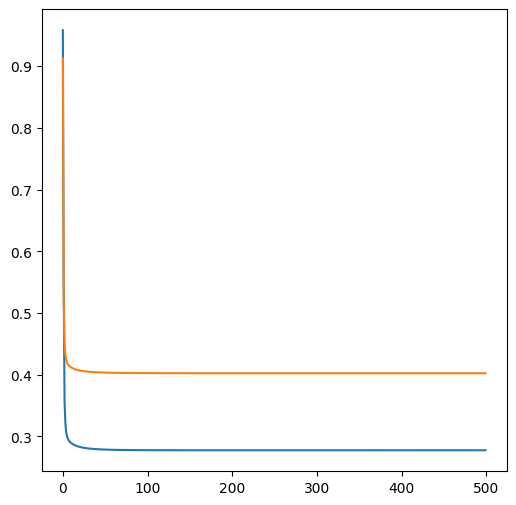

In [17]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(train_loss_value)), train_loss_value)
plt.plot(range(len(test_loss_value)), test_loss_value)

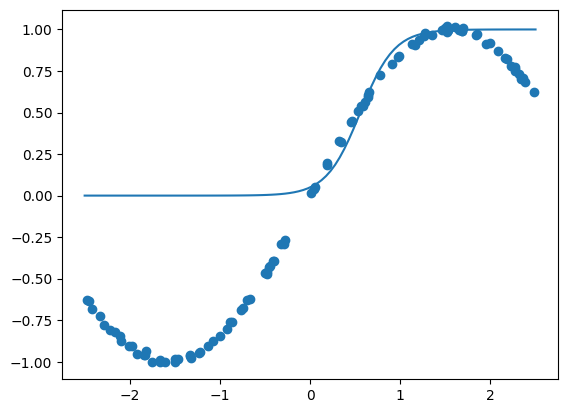

In [18]:
# Neural Netが実際にどういう関数形をしているかを確認。
xplot = np.linspace(-2.5, 2.5, 100).reshape(100, 1)
xplot = torch.tensor(xplot, dtype=torch.float32)
yplot = net.forward(xplot)

# プロットするためにはtensor形式をnumpy形式に戻す必要がある。（デタッチする）
plt.plot(xplot.detach().numpy().copy(), yplot.detach().numpy().copy())
plt.scatter(x, t)
plt.show()

---
## CNNによるMNIST分類

In [23]:
# 変換規則を宣言
trans = torchvision.transforms.ToTensor()

In [26]:
train_set = torchvision.datasets.MNIST(
    root = '~/datasets', 
    train=True,
    download=True,
    transform=trans,
)

# train_set[i][j][k]

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/user/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /home/user/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/user/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /home/user/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/user/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/user/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting /home/user/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/user/datasets/MNIST/raw



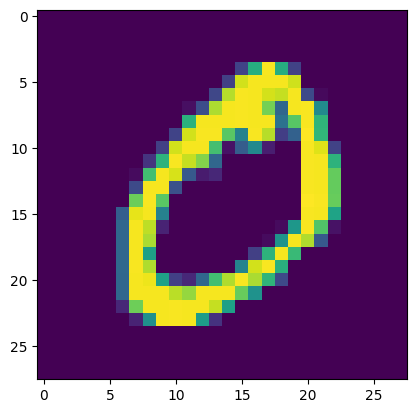

In [52]:
plt.imshow(train_set[1][0][0])

5


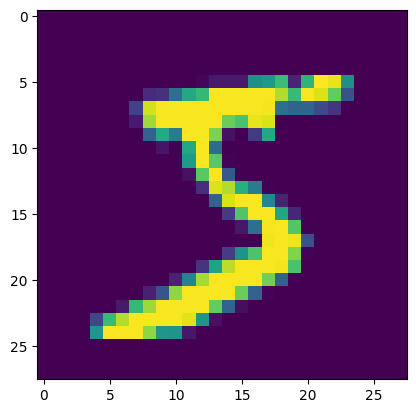

In [57]:
print(train_set[0][1])
plt.imshow(train_set[0][0][0])

In [ ]:
# batch_size個ずつランダムに取り出す準備。
# (これからtrain_loaderやtest_loaderを呼び出すとbatch_size個ずつデータを取り出すことができる。)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

In [ ]:
# testデータも用意する。
test_set = torchvision.datasets.MNIST(
    root = '~/datasets', 
    train=False,
    download=True,
    transform=trans,    
)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)
        #Conv2d(in_channel,out_channel,kernel_size)
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        #縦に並べる
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
net = CNN()

In [ ]:
# 今回は分類問題なのでcross entropyを用いる。
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [ ]:
train_loss_value=[]
train_acc_value=[]
test_loss_value=[]
test_acc_value=[]

In [ ]:
Tall = 10

In [ ]:
# 学習
for epoch in range(Tall):
    sum_loss = 0
    sum_acc = 0
    for barch in train_loader:
        xtrain, ttrain = batch
        optimizer.zero_grad() # 勾配の初期化
        ytrain = net(xtrain)
        ylabel = 